In [1]:
import json
import pandas

json_data = json.load(open("data/mmum.json"))
data = pandas.json_normalize(json_data)
data["style"].value_counts()[:10]

Pale Ale                      147
India Pale Ale                 84
Helles Hefeweizen              78
Stout                          55
...außer Kategorie             44
Helles                         33
Märzen/Oktoberfest             30
Belgisches Witbier/Blanche     25
Deutsches Pilsner              24
Weizenbock                     24
Name: style, dtype: int64

In [2]:
malts = pandas.json_normalize(json_data, "malts", ["style"], record_prefix="malt_")

In [3]:
# Pick a style
style_malts = malts[malts["style"] == "Pale Ale"]
# style_malts["malt_kind"].value_counts()[:10]

malt_ratio = style_malts.groupby("malt_kind")['malt_amount_percent'].agg(['min', 'max', 'mean', 'count'])
malt_ratio = malt_ratio[malt_ratio['count'] > 3] # Filter low amount of data points
malt_ratio.sort_values(by='count', ascending=0)

,min,max,mean,count
malt_kind,,,,
pilsner,4.901961,96.629213,57.449750,71
pale ale,14.410828,100.000000,66.059918,65
carahell,1.818182,20.000000,7.256714,36
wiener,7.142857,100.000000,39.960408,35
münchner,0.924855,88.000000,19.081258,33
carapils,1.607717,25.925926,7.245270,21
weizen hell,6.382979,50.092764,18.201397,15
sauer,0.892857,9.090909,2.955332,15
weizen,4.166667,15.000000,8.421388,14


In [4]:
top_malts = style_malts["malt_kind"].value_counts()[:10].index.values
style_top_malts = style_malts[style_malts['malt_kind'].isin(top_malts)] # Get only the values of the mostly used malts
style_top_malts.loc[:, ["malt_kind", "malt_amount_percent"]]

,malt_kind,malt_amount_percent
34,wiener,61.273210
35,pilsner,32.625995
36,carahell,6.100796
37,pale ale,60.000000
38,münchner,20.000000
...,...,...
3977,wiener,54.545455
3978,pilsner,27.272727
3979,münchner,9.090909
3980,haferflocken,9.090909


<AxesSubplot:title={'center':'malt_amount_percent'}, xlabel='malt_kind'>

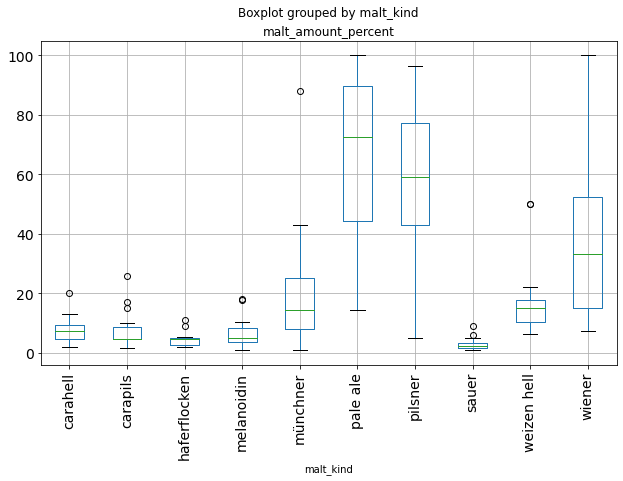

In [10]:
style_top_malts.boxplot(by="malt_kind", column=["malt_amount_percent"], rot=90, fontsize=14, figsize=[10, 6])